In [10]:
import mglearn
import matplotlib.pyplot as plt

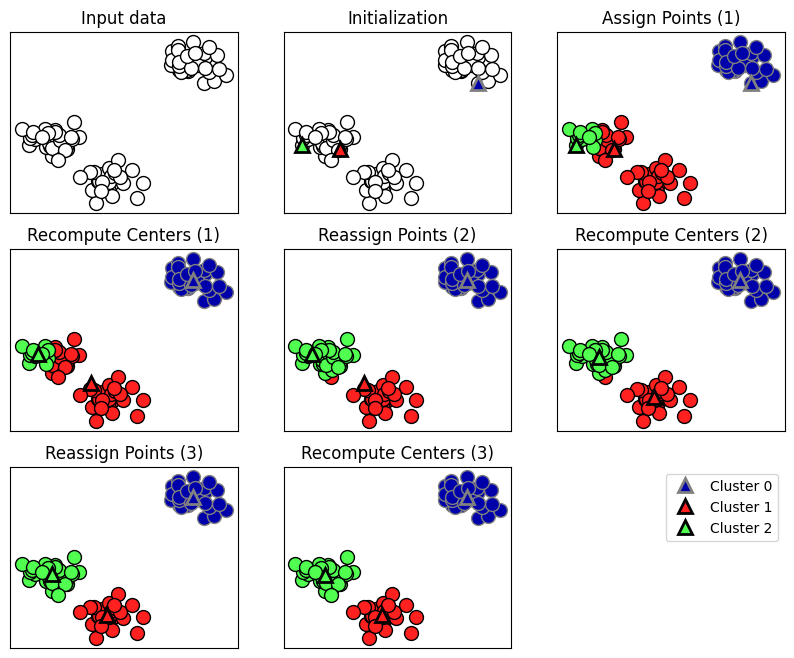

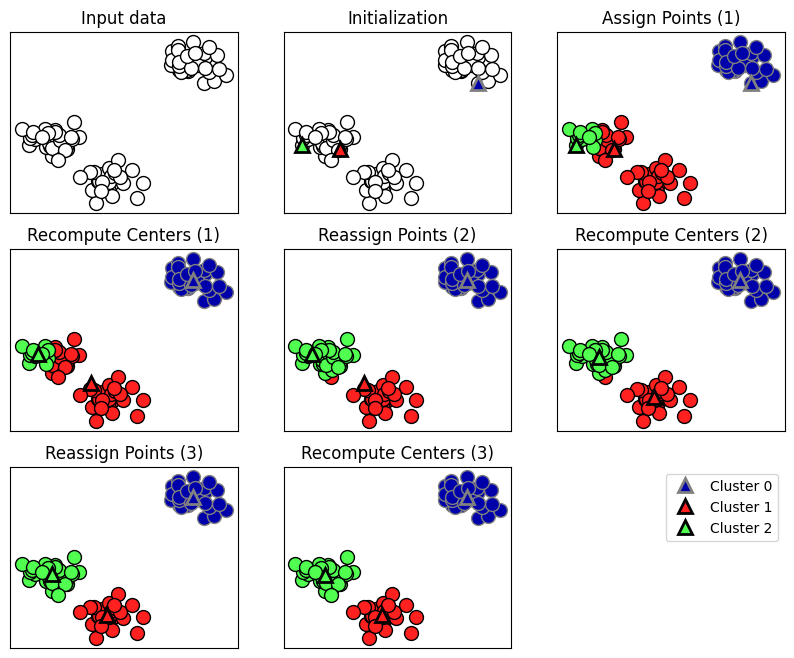

In [14]:
# 전처리만 잘하면 빠르고 잘됨
mglearn.plots.plot_kmeans_algorithm()
plt.show()

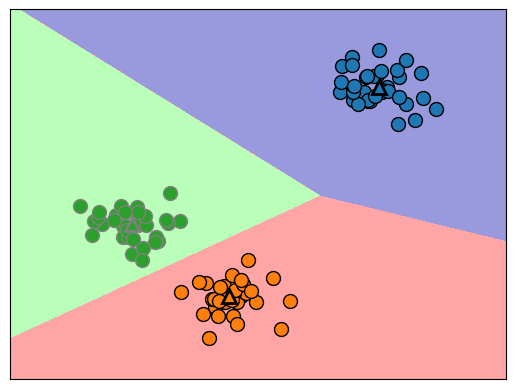

In [12]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

1. 비지도학습은 답이 없다(= y값이 없다)
2. 예측을 하려면 예측값이 필요해서 y를 둬야함 -> 완벽한 비지도 학습은 없다

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

KMeans(n_clusters=3)

In [16]:
kMeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)

In [17]:
kMeans.predict(X)

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF,PCA
from sklearn.cluster import KMeans, DBSCAN

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# ❗이미지 전처리(파이토치 비전으로 한방에 가능)
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) #사이즈 70%
mask = np.zeros(people.target.shape, dtype=bool) #target개수만큼 mask변수 모두 '0'
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][: 50]] = 1
X_people = people.data[mask] #적당히 0,1로 이루어진 mask
y_people = people.target[mask]
X_people = X_people / 255.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)
# 왜 지도학습처럼 하는가

In [ ]:
#분해
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
#군집, 분류
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=100, random_state=0)

In [25]:
kmeans.predict(X_test)

array([24, 38, 13, 78, 92, 37,  6, 51, 81, 81, 36, 65, 86, 36,  5, 78, 39,
       31, 94, 15, 41, 66, 87, 35, 10, 99, 36, 24, 36, 57, 63, 32, 15, 40,
       43, 87, 44, 54, 94,  4, 80, 50, 41, 23, 61, 46, 41, 50, 36, 36, 23,
       44, 60, 63,  6, 34, 60, 36, 78, 36, 99, 15, 69, 77, 28,  1, 54, 55,
        5, 50, 88, 77, 73, 43, 34, 99, 23, 57, 13, 54, 93, 19, 78, 54, 53,
       54, 77, 43, 13, 46, 26, 48, 18, 92, 73,  9, 81,  1, 46, 11, 57, 32,
       77, 62,  5, 53, 55, 47, 99, 54, 43, 69, 62, 65,  1, 46, 50,  4, 39,
       15, 87, 50, 52, 55,  1, 65, 54, 43, 26, 62, 31,  4, 52, 81, 67, 65,
       50, 32,  1,  5, 26, 35, 78, 21,  1, 78, 90, 82, 94, 35, 81, 94, 85,
        6, 31, 23,  6, 52, 35, 87, 54, 10,  7, 65, 39, 94, 57, 62, 12, 31,
       48, 54, 76, 62, 93, 38, 39, 68, 99, 82, 26, 99, 94, 13, 50, 35, 93,
       50, 94, 63, 98, 42, 57, 28, 85, 41, 87, 55, 81, 66, 46, 81, 53, 94,
       57, 34, 80, 34, 61, 15, 78, 34, 27, 28, 40, 28, 63, 28, 28, 49,  6,
        9, 80, 73, 65, 36

In [27]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmean = kmeans.cluster_centers_[kmeans.predict(X_test)] #kmean의 클러스터 중간 ## 변수의 맨끝에 '_'로 끝나는 경우 계산한 값을 주는거임(=고치지마라)

In [28]:
X_reconstructed_kmean

array([[0.00140843, 0.00145937, 0.00150006, ..., 0.00234878, 0.00234653,
        0.00226259],
       [0.00118224, 0.00118224, 0.0012162 , ..., 0.00253364, 0.0023978 ,
        0.00224593],
       [0.00141092, 0.00147063, 0.00154842, ..., 0.00066581, 0.00060761,
        0.00064319],
       ...,
       [0.00117362, 0.00121876, 0.00130334, ..., 0.00148675, 0.00139633,
        0.00129395],
       [0.00132001, 0.0014037 , 0.00147357, ..., 0.00149263, 0.00148482,
        0.00143646],
       [0.00115463, 0.00116242, 0.00116858, ..., 0.0013482 , 0.00119277,
        0.0011372 ]], dtype=float32)

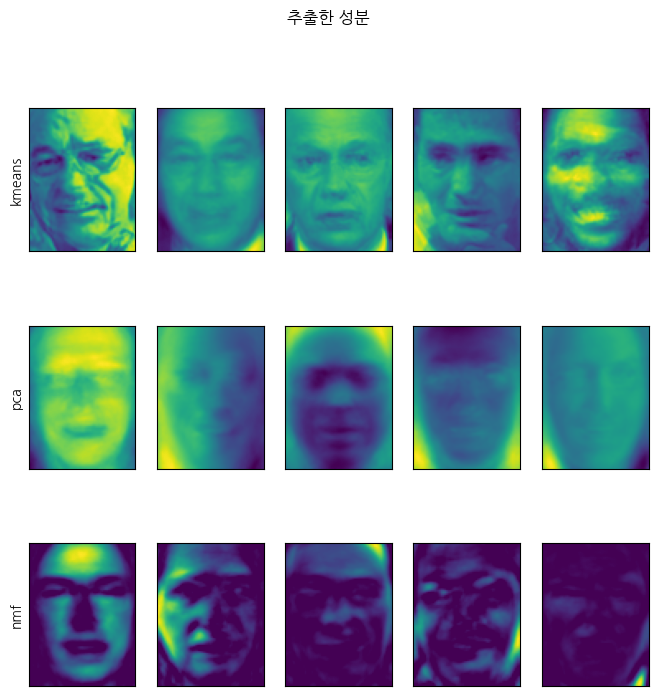

In [30]:
## zip(), enumerate()
# 화면 출력
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks':()}) #3행 5열, 정사각형 사이즈, 'xtick, ytick'을 튜플로
fig.suptitle('추출한 성분')
image_shape = people.images[0].shape
# 하나의 데이터셋으로 묶어서
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

# 각각 이미지에 붙어있는 레이블값
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')
plt.show()

## 재구성

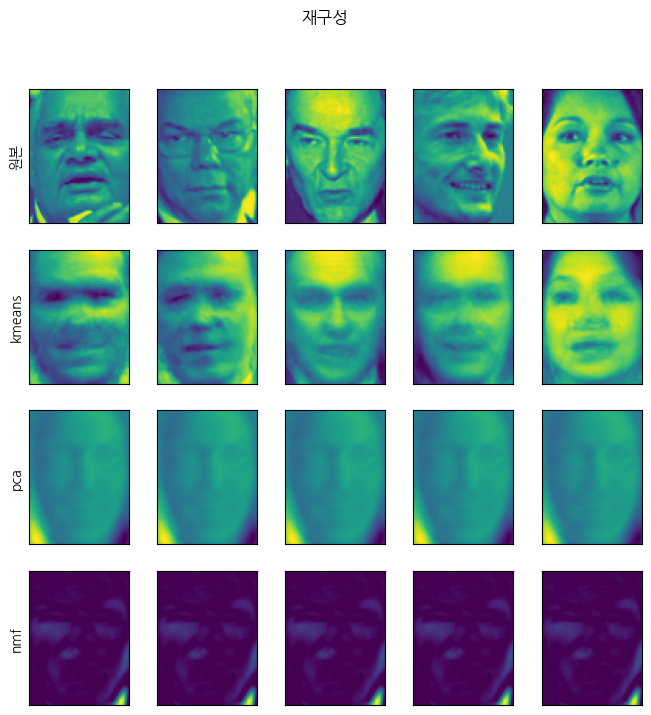

In [31]:
# 화면 출력
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks':()}) #3행 5열, 정사각형 사이즈, 'xtick, ytick'을 튜플로
fig.suptitle('재구성')
image_shape = people.images[0].shape
# 하나의 데이터셋으로 묶어서
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T,X_test, X_reconstructed_kmean, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[3].imshow(comp_nmf.reshape(image_shape))

# 각각 이미지에 붙어있는 레이블값
axes[0,0].set_ylabel('원본')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')
plt.show()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = 
dbscan = DBSCAN(min_samples=3, eps=15) # 밀도가 가장 높은 거리에서 최소 샘플이 3개가 안되면 noise

In [ ]:
noise = X_people[lables == -1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks'})